# FREQUENZA v B USANDO SEGNALE LOCK-IN

---

## 0. inizio dal ricordarmi come ho organizzato i dati

Ho scritto funzioni che leggono le colonne desiderate nei file e producono il grafico.

False False
0 (408,) (408,)


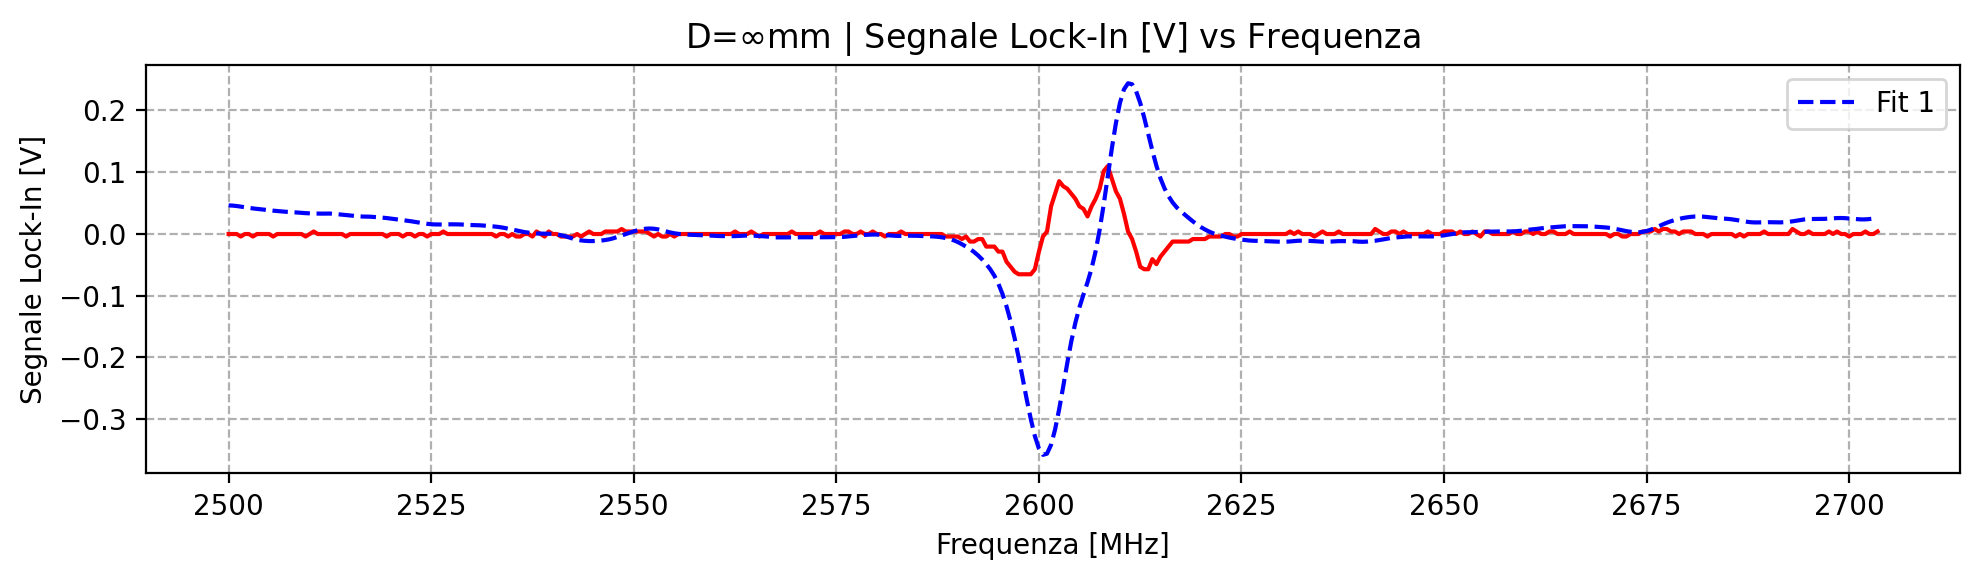

False False
1 (855,) (855,)


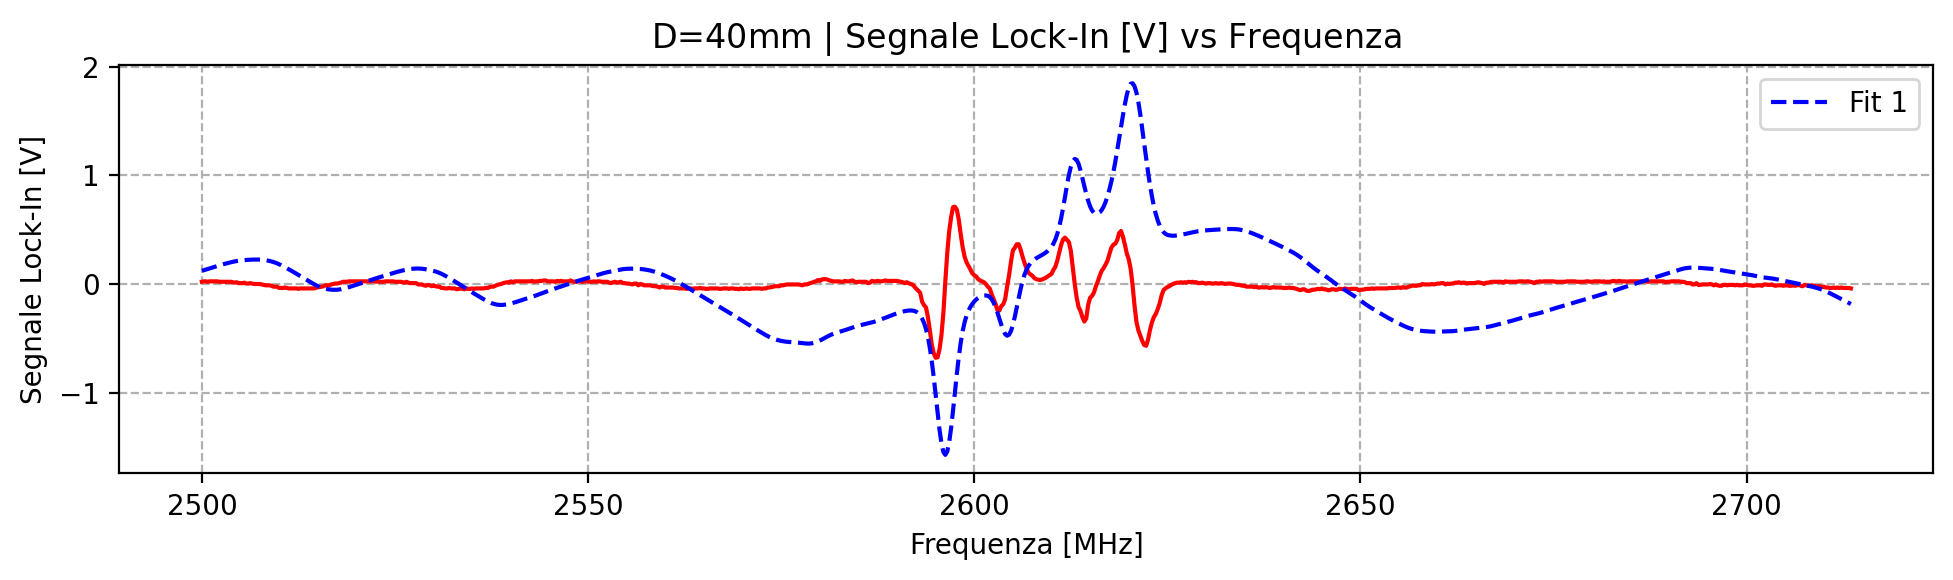

False False
2 (857,) (857,)


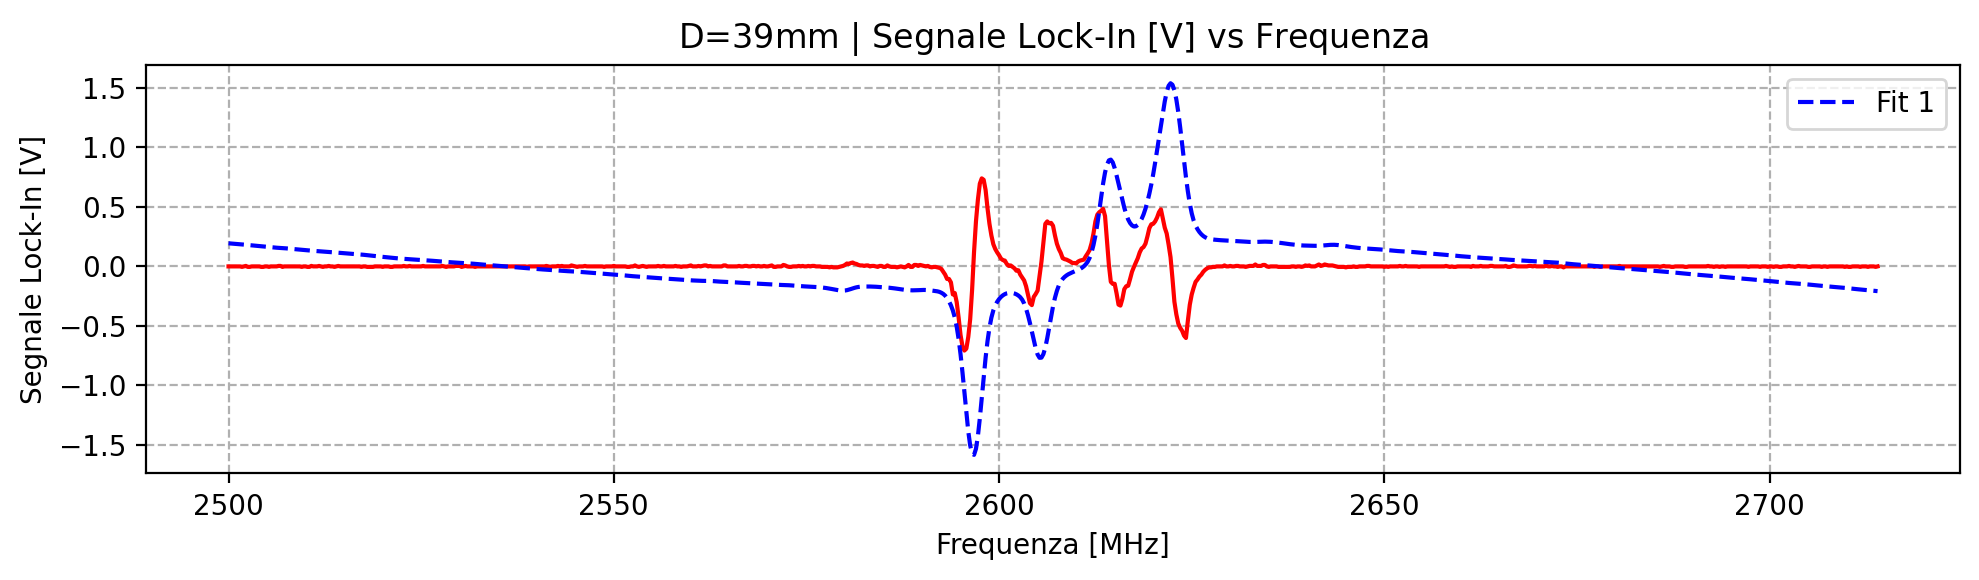

False False
3 (865,) (865,)


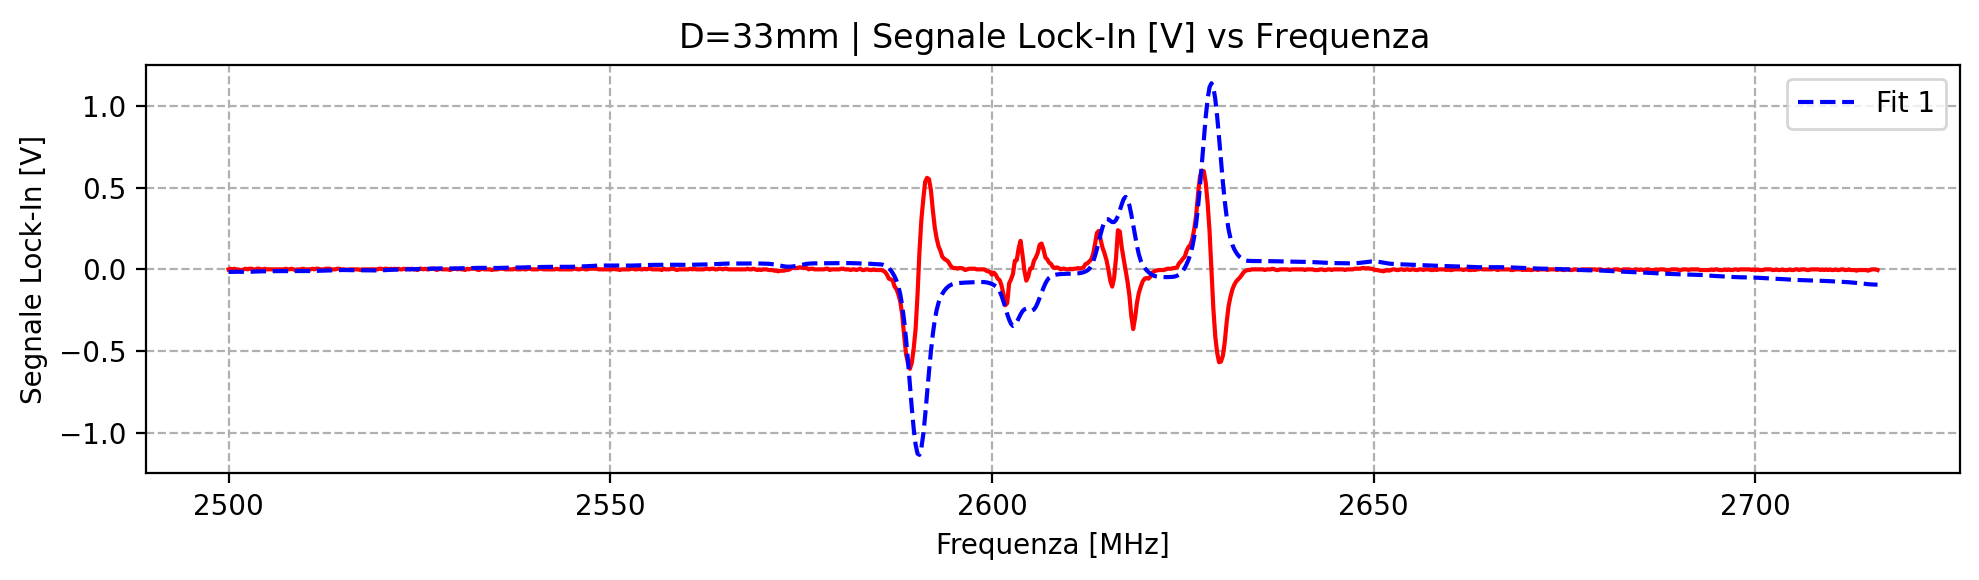

False False
4 (859,) (859,)


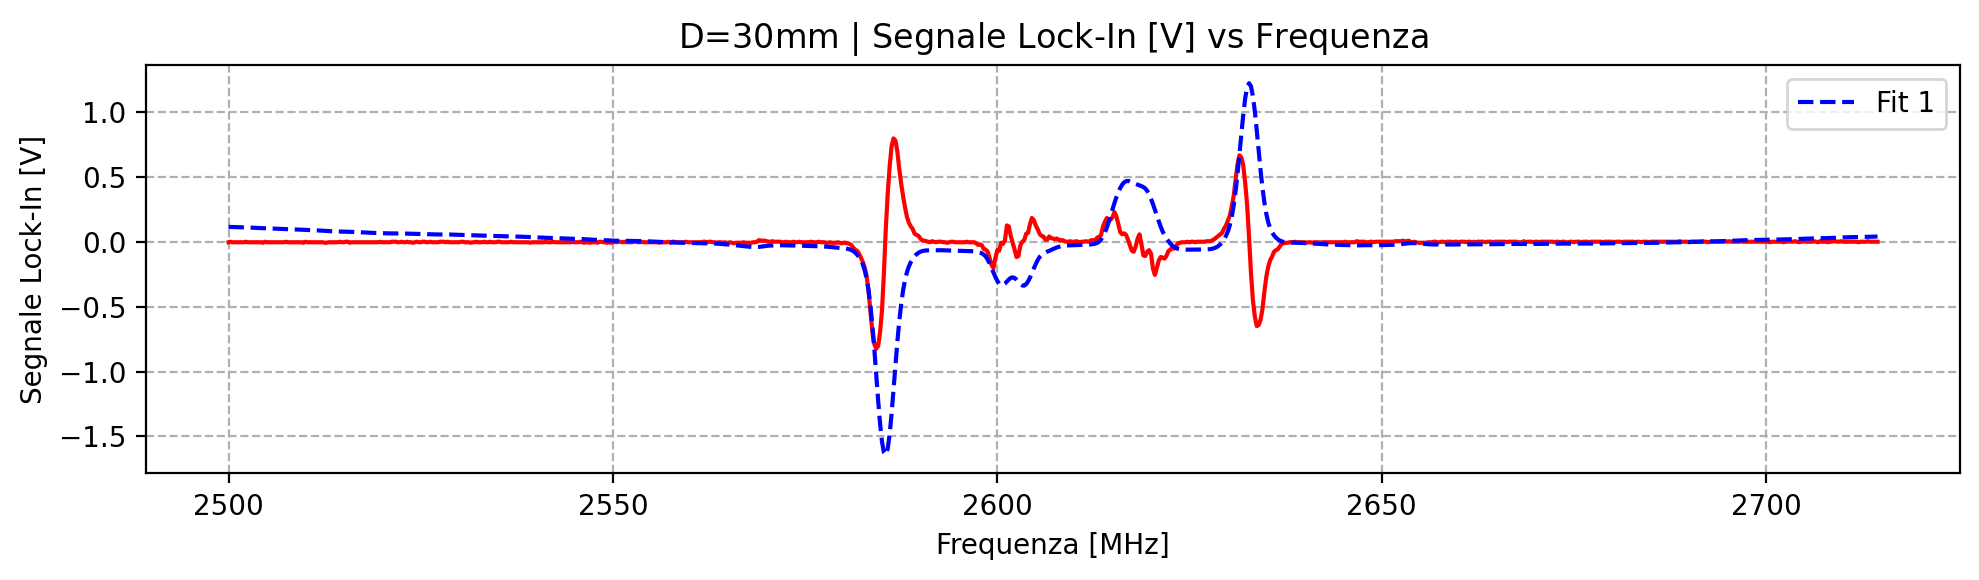

False False
5 (863,) (863,)


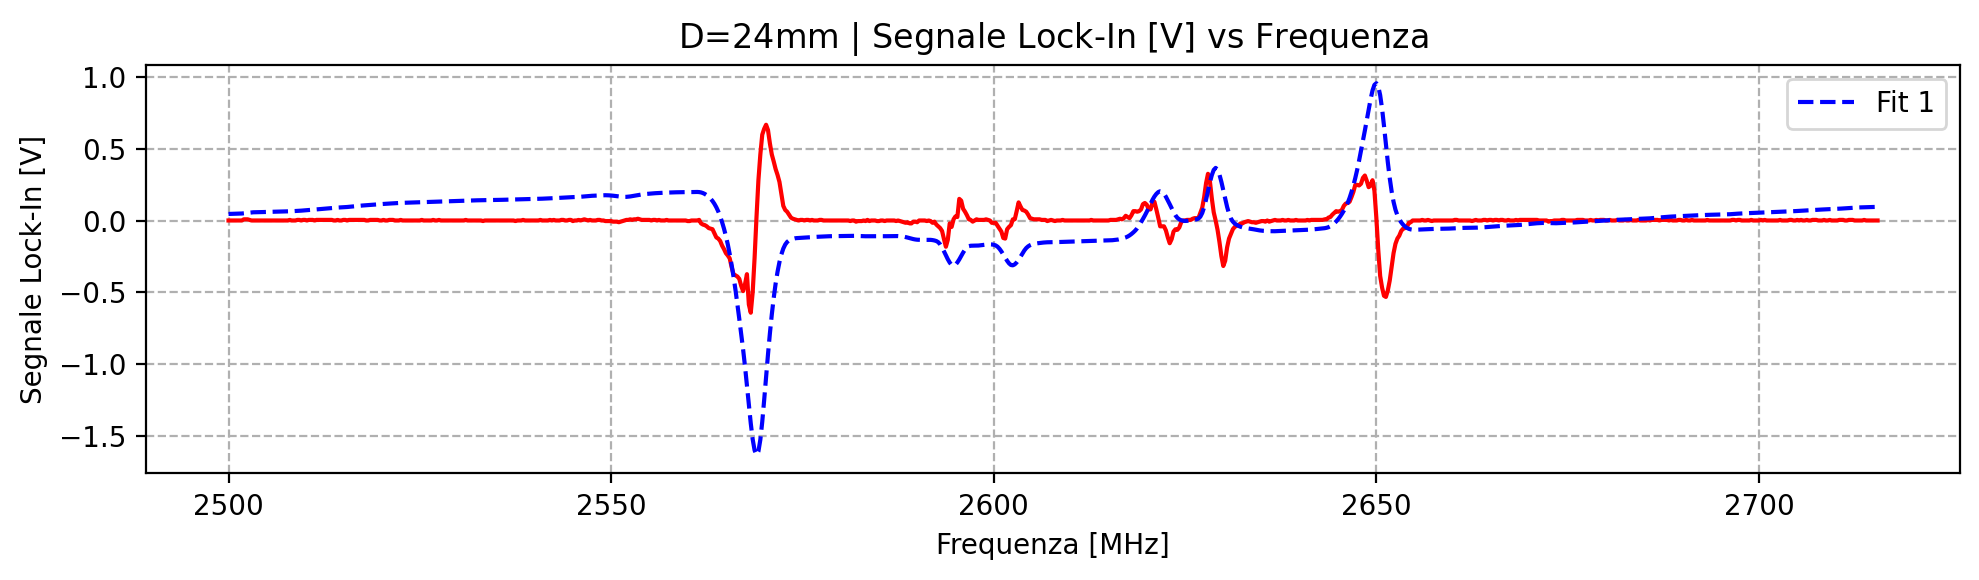

False False
6 (859,) (859,)


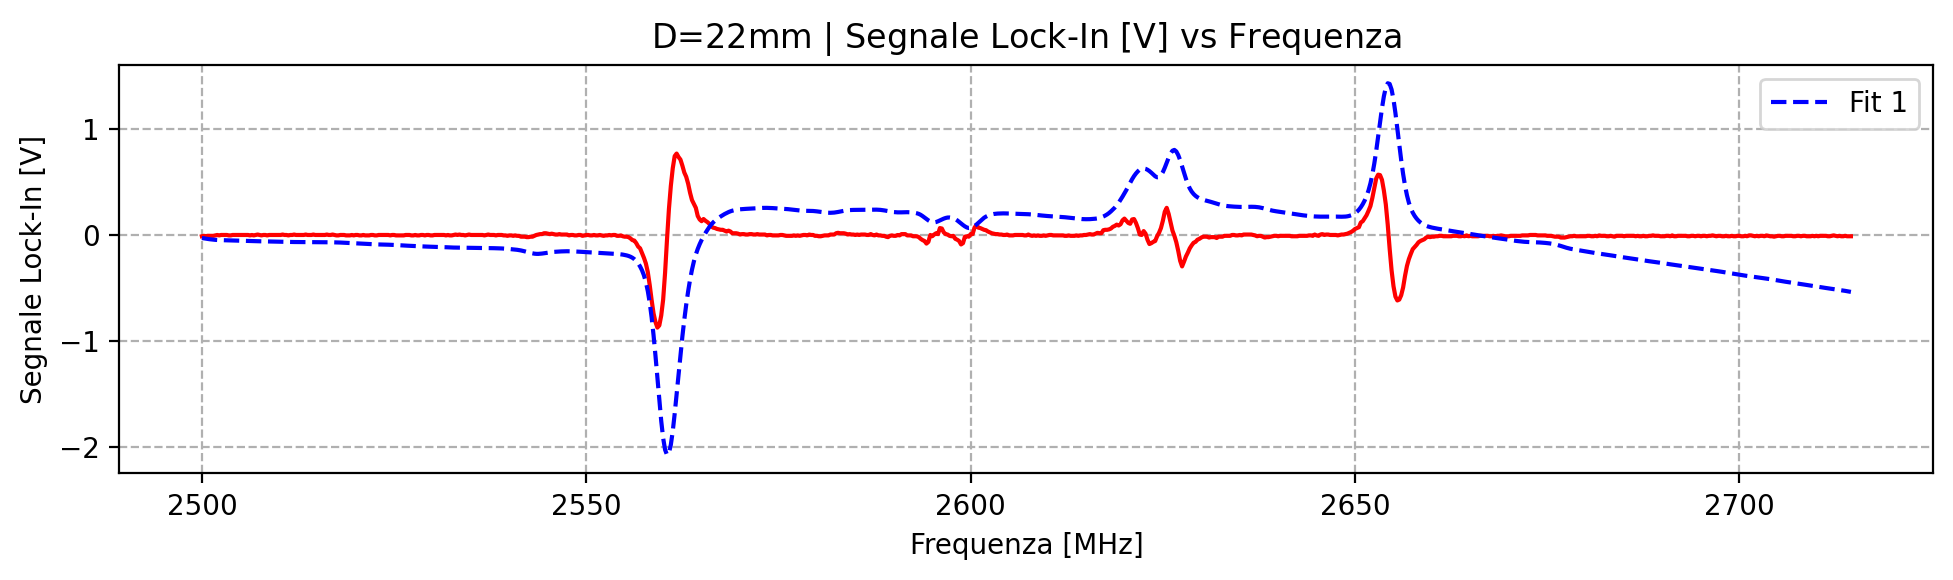

False False
7 (857,) (857,)


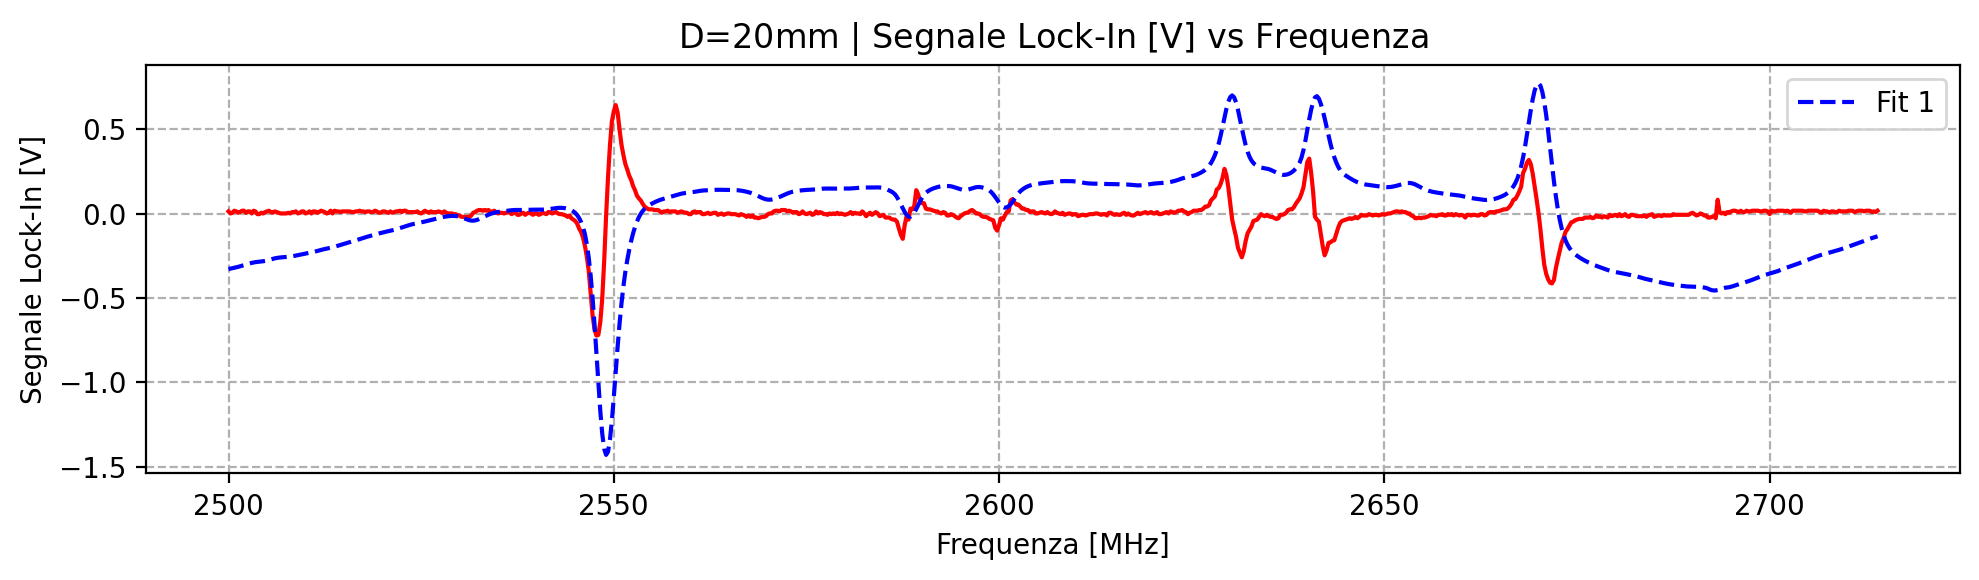

False False
8 (855,) (855,)


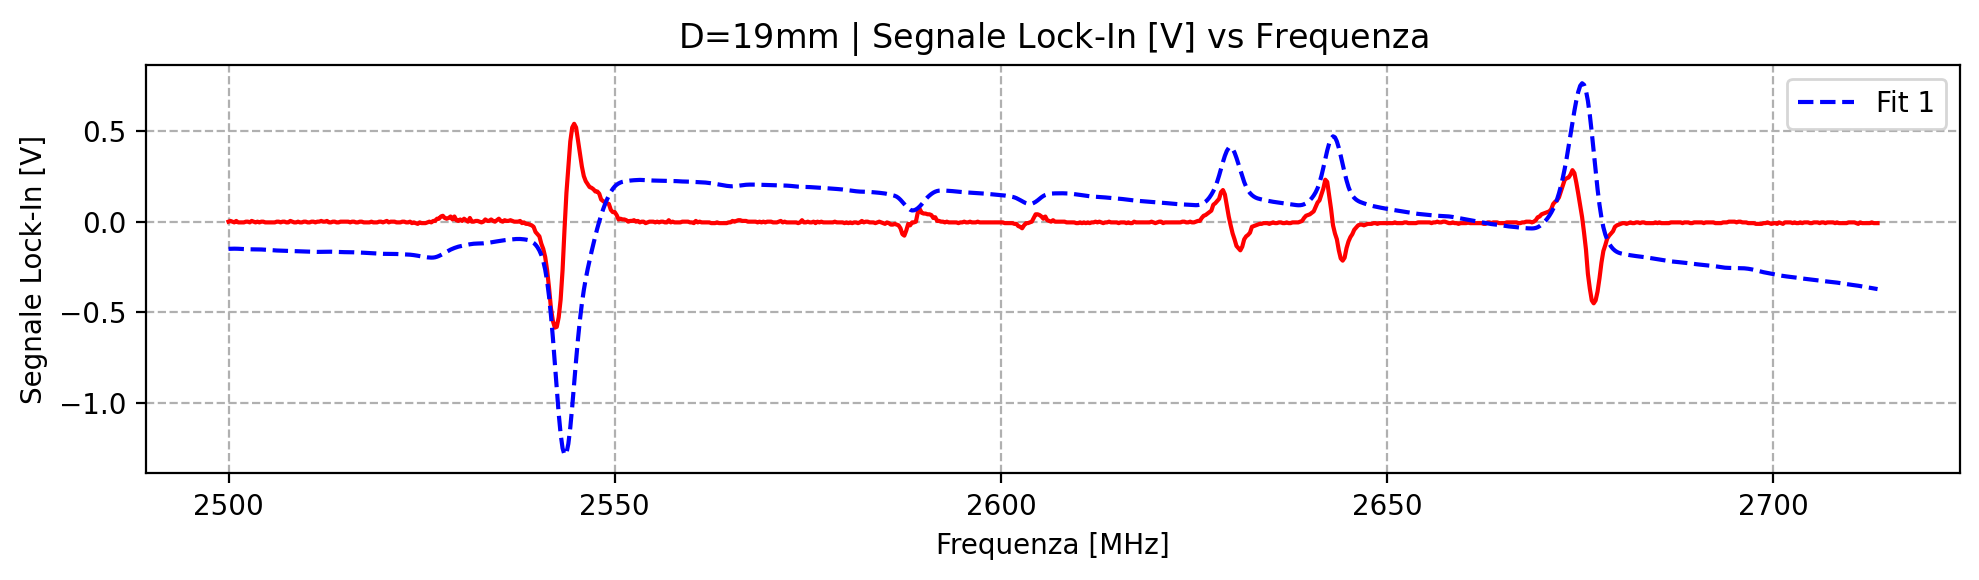

False False
9 (856,) (856,)


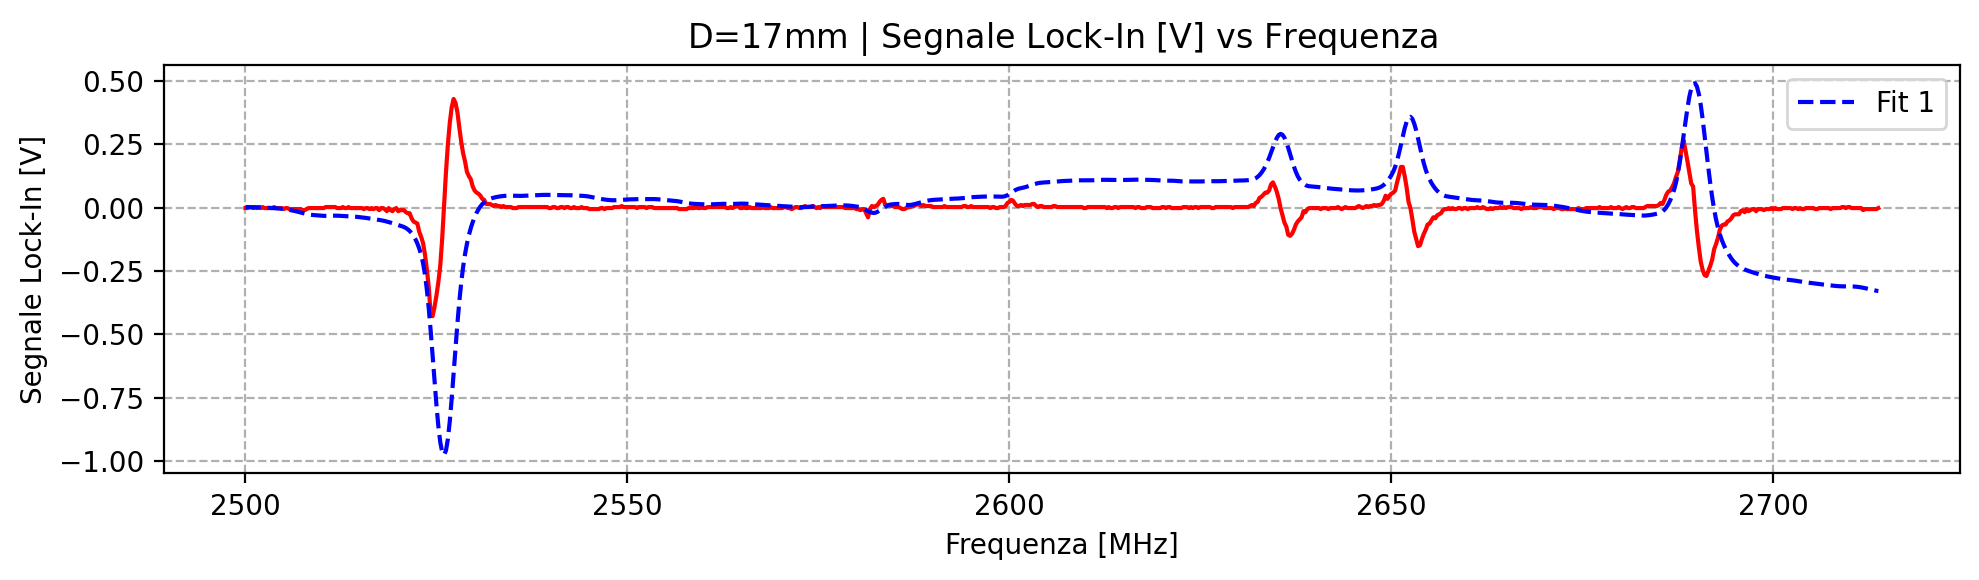

In [ ]:

from odmr_subroutines.analysis_subroutines import *
from scipy.integrate import cumulative_trapezoid
from scipy.signal import savgol_filter
from scipy.signal import detrend


def build_name (dist):
    return f"data/cristallo2_aligned_cleaned/odmr_dist_{dist}_cleaned.csv"

distanze = [17, 19, 20, 22, 24, 30, 33, 39, 40, 1000]

for i, dist in enumerate( reversed(distanze) ):
    # costruisco il nome del file
    nome = build_name(dist)
    # leggo il file e immagazzino le informazioni in un oggetto 'spettro' (dizionario)
    spettro = leggi_file_odmr(nome)
    # correggo lo spettro lock-in
    spettro = trasla_spettro_lock_in(spettro)
    
    # Integrazione rispetto alla frequenza
    f = np.asarray(spettro['freq']).ravel()
    l = np.asarray(spettro['lock']).ravel()
    print(np.any(np.isnan(f)), np.any(np.isnan(l)))
    print(i, f.shape, l.shape)  # controllo

    # Filtra il segnale lock-in per rimuovere rumore ad alta frequenza
    l_filtered = savgol_filter(l, window_length=11, polyorder=3)
    
    odmr_raw = cumulative_trapezoid(l_filtered, f, initial=0)
    # Rimuovi trend lineare (baseline) [non c'è bisogno]
    # odmr_raw = detrend(odmr_raw, type='linear')
    
    # plotto lo spettro
    plot_odmr(spettro, key='lock', dist=dist, fit_curves=[(spettro['freq'], odmr_raw)])